In [123]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import time
from sklearn import tree 
import dtreeviz as dv


In [124]:
df=pd.read_csv("media prediction and its cost.csv")
df.head()
plt.style.use('fivethirtyeight')

<div style="background-color:#E7B10A;padding:30px;border-radius:10px">
<center>
<h1 style="">Understanding the Dataset</h1>
</center>
</div>

<div style="padding:20px; background-color:#FEA1A1;border-radius:10px; font:Arial; font-size:15px;">
    <p>Different Columns in the Dataset</p>
</div>

In [109]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [125]:
df.info()
df ['avg. yearly_income']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

0        $10K - $30K
1        $50K - $70K
2        $10K - $30K
3        $30K - $50K
4        $30K - $50K
            ...     
60423    $10K - $30K
60424    $30K - $50K
60425    $30K - $50K
60426    $70K - $90K
60427    $10K - $30K
Name: avg. yearly_income, Length: 60428, dtype: object

In [ ]:
df.dtypes.value_counts()

<div style="padding:20px; background-color:#FEA1A1;border-radius:10px; font:Arial; font-size:15px">
    <p>Dividing Data Based on Data Type</p>
</div>

In [ ]:
print('Columns with Object data type:')
df.columns[df.dtypes=='object']

In [ ]:
print('columns with Float data type')
df.columns[df.dtypes!='object']

<div style="padding:20px; background-color:#FEA1A1;border-radius:10px; font:Arial; font-size:15px">
    <p>Discovering All Unique Values of Each Column</p>
</div>

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'\nUnique values in column {col}:')
        print(df[col].unique())

<div style="background-color:#E7B10A;padding:30px;border-radius:10px;">
<center>
<h1 style="">Data Analysis</h1>
</center>
</div>

In [ ]:
_, ax = plt.subplots(3,1, figsize=(14,28))

sns.countplot(ax=ax[0], data=df, x='sales_country')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('\nTotal Number of Article Sold by Country\n')

sns.histplot(ax=ax[1], data=df, y='store_state', hue='sales_country')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('\nTotal Number of Article Sold by State\n')

sns.histplot(ax=ax[2], data=df, y='store_city', hue='sales_country')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('\nTotal Number of Article Sold by State')

plt.show()

<div style="padding:15px; background-color:#98EECC;border-radius:10px; font:Arial; font-size:15px">
<p>The data covers stores in ten states across America</p>
<ul>
    <li>Three are in the United States</li>
    <li>Six are in Mexico</li>
    <li>One in Canada</li>
</ul>
<p>Their are a total of 19 cities in the data:<p>
<ul>
    <li>Ten in the United States</li>
    <li>Seven in Mexico</li>
    <li>Two in Canada</li>
</ul>
</div>

In [ ]:
_, ax = plt.subplots(5,1, figsize=(14,28)) 

sns.countplot(ax=ax[0], data=df, y='gender')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_yticks([1,0])
ax[0].set_title('\n\nCustomer Gender (for each article bought)')

sns.countplot(ax=ax[1], data=df, y='marital_status')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_yticks([1,0])
ax[1].set_title('\n\nCustomers Marital Status')

sns.countplot(ax=ax[2], data=df, y='houseowner')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_yticks([1,0])
ax[2].set_title('\n\nCustomers Home Ownership')

sns.countplot(ax=ax[3],data=df, y='education')
ax[3].set_ylabel(None)
ax[3].set_xlabel(None)
ax[3].set_yticks([0,1,2,3,4])

sns.countplot(ax=ax[4], data=df, y='occupation')
ax[4].set_ylabel(None)
ax[4].set_xlabel(None)
ax[4].set_yticks([0,1,2,3,4])
ax[4].set_title('\n\nCustomers Occupation Type')

plt.show()

In [ ]:
_, ax = plt.subplots(4,1, figsize=(14,28))

sns.countplot(ax=ax[0], data=df, y='food_family')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_yticks([0,1,2])
ax[0].set_title('\nItems purchased by Family')

sns.histplot(ax=ax[1], data=df, y='food_category', hue='food_family')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_yticks([0,9,18,27,36,45])
ax[1].set_title('\nItems purchased by Category')

sns.countplot(ax=ax[2], data=df, y='low_fat')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_yticks([0,1])
ax[2].set_title('\nIs the product Low Fat?')

sns.countplot(ax=ax[3], data=df, y='recyclable_package')
ax[3].set_ylabel(None)
ax[3].set_xlabel(None)
ax[3].set_yticks([0,1])
ax[3].set_title('\nIs the product Recyclable?')

plt.show()

<div style="padding:15px; background-color:#98EECC;border-radius:10px; font:Arial; font-size:15px">
<p>The dataset is evenly splitted between married and single customers.</p>
<p>A majority of the customer have high school level, customer starting university without graduating and with a bachelor are the second group. Finally people with a graduate degree are the rarest.</p>
</div>

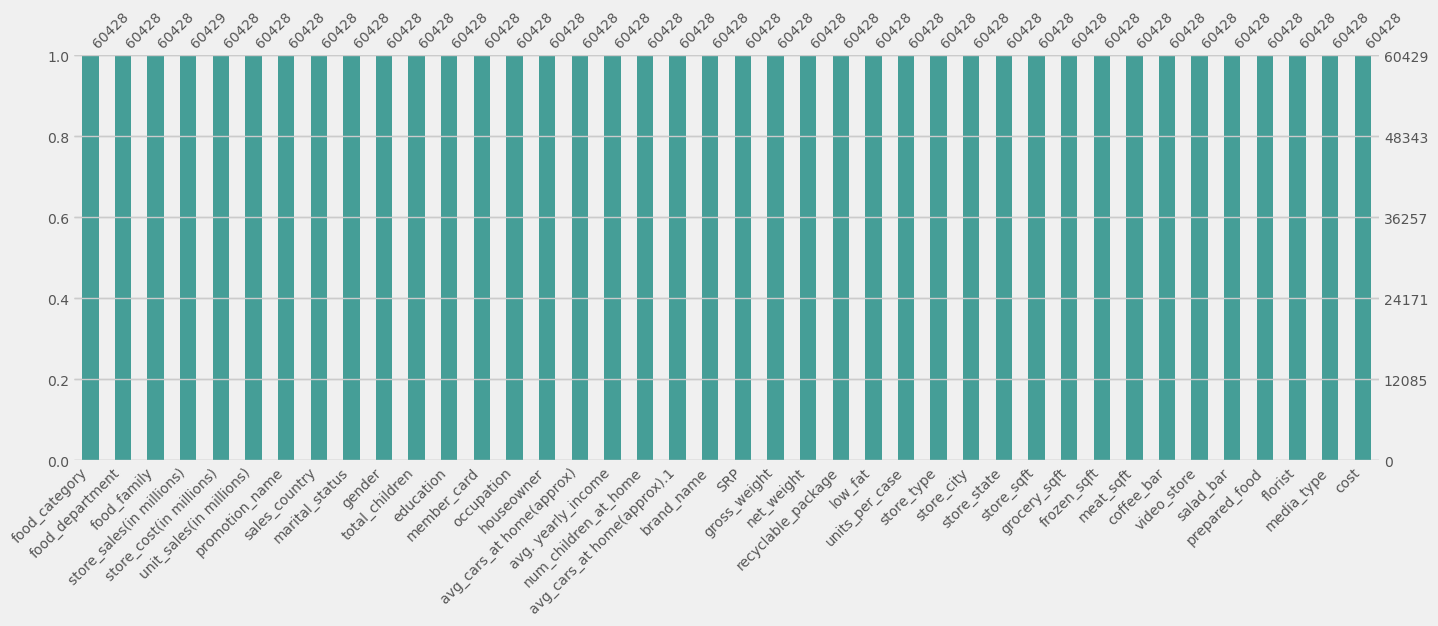

In [118]:
import missingno as msno
msno.bar(df,figsize=(15, 5),fontsize=10,color = '#459E97');

<div style="padding:15px; background-color:#98EECC;border-radius:10px; font:Arial; font-size:15px">
<p>We see that the data is cleaned so we don't have to do any terminologies to handle it.<p>
<div>

<div style="padding:20px; background-color:#FEA1A1;border-radius:10px; font:Arial; font-size:15px">
    <p>Handling Outliers</p>
</div>

In [ ]:
numeric_data=df[["store_sales(in millions)","store_cost(in millions)","meat_sqft","frozen_sqft","unit_sales(in millions)"]]
numeric_data.plot(subplots =True, kind = 'box', layout = (5,8), figsize = (30,30),patch_artist=True,color="#459E97")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

In [119]:
def out_lairs(col):
    Q1 = df[col].quantile(0.25)
    Q3 =  df[col].quantile(0.75)
    IQR = Q3-Q1
    data_out = df.loc[(df[col] < (Q1-1.5*IQR)) | (df[col] > (Q3+1.5*IQR))][:10]
    
    return data_out 
out_lairs("store_sales(in millions)")

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
72,Breakfast Foods,Frozen Foods,Food,16.20,5.346,5.0,Two for One,USA,S,F,...,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio, TV",57.52
102,Breakfast Foods,Frozen Foods,Food,16.20,6.156,5.0,Weekend Markdown,USA,S,M,...,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,Daily Paper,140.57
138,Breakfast Foods,Frozen Foods,Food,16.20,5.508,5.0,Two for One,Mexico,M,M,...,30351.0,4819.0,3213.0,0.0,0.0,0.0,0.0,0.0,Cash Register Handout,123.63
171,Breakfast Foods,Frozen Foods,Food,16.20,5.508,5.0,Price Slashers,Canada,S,M,...,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,"Sunday Paper, Radio, TV",77.24
371,Bread,Baked Goods,Food,19.65,6.288,5.0,Dollar Cutters,USA,M,M,...,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio, TV",144.18
384,Bread,Baked Goods,Food,18.70,6.919,5.0,Shelf Clearing Days,USA,M,M,...,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,Radio,99.77
407,Bread,Baked Goods,Food,19.30,7.141,5.0,Two for One,USA,M,M,...,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio, TV",57.52
457,Bread,Baked Goods,Food,18.70,6.358,5.0,Two for One,USA,M,M,...,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio, TV",57.52
673,Bread,Baked Goods,Food,19.65,8.253,5.0,Money Savers,Mexico,M,M,...,20141.0,6393.0,4262.0,1.0,1.0,1.0,1.0,1.0,TV,65.70
850,Bread,Baked Goods,Food,18.70,6.545,5.0,Price Slashers,Canada,M,F,...,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,"Sunday Paper, Radio, TV",77.24


In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

<div style="padding:15px; background-color:#98EECC;border-radius:10px; font:Arial; font-size:15px">
<p>Clearly, there are 2 main groups that are correlated. The first refers to the size of the store and its sections and the second group if the store has specific sections. We will not remove these variables as they may be important later on.</p>
</div>

In [120]:
import scipy.stats as stats

categorical_features = df.select_dtypes(include='object').columns
for feature in categorical_features:
    groups = []
    for value in df[feature].unique():
        groups.append(df[df[feature] == value]['cost'])
    f, p = stats.f_oneway(*groups)
    print(f"Feature: {feature} \nF-value: {f} \nP-value: {p} \n")

/home/gesskay/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0


Feature: food_category 
F-value: nan 
P-value: nan 

Feature: food_department 
F-value: nan 
P-value: nan 

Feature: food_family 
F-value: nan 
P-value: nan 

Feature: promotion_name 
F-value: nan 
P-value: nan 

Feature: sales_country 
F-value: nan 
P-value: nan 

Feature: marital_status 
F-value: nan 
P-value: nan 

Feature: gender 
F-value: nan 
P-value: nan 

Feature: education 
F-value: nan 
P-value: nan 

Feature: member_card 
F-value: nan 
P-value: nan 

Feature: occupation 
F-value: nan 
P-value: nan 

Feature: houseowner 
F-value: nan 
P-value: nan 

Feature: avg. yearly_income 
F-value: nan 
P-value: nan 

Feature: brand_name 
F-value: nan 
P-value: nan 

Feature: store_type 
F-value: nan 
P-value: nan 

Feature: store_city 
F-value: nan 
P-value: nan 

Feature: store_state 
F-value: nan 
P-value: nan 

Feature: media_type 
F-value: nan 
P-value: nan 



<div style="padding:15px; background-color:#98EECC;border-radius:10px; font:Arial; font-size:15px">
<p>The F value is used to assess the importance of an independent variable in relation to the dependent variable. The larger the F value, the greater the importance of the independent variable. The P value, on the other hand, measures the probability that the difference observed in the dependent variable between the categories of the independent variable is just the result of chance. A low P-value indicates that the probability is small and the relationship between the variables is significant.</p>
</div>

<div style="padding:20px; background-color:#FEA1A1;border-radius:10px; font:Arial; font-size:15px">
    <p>Dropping Unnecessary Columns</p>
</div>

In [126]:
features_to_drop = ['avg_cars_at home(approx).1', 'net_weight', 'meat_sqft', 'salad_bar', 'food_category', 'food_department', 'food_family', 'sales_country', 'marital_status', 'education', 'member_card', 'houseowner', 'brand_name']

df.drop(columns=features_to_drop, inplace=True)

In [128]:
categorical_cols = df.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)
df.dropna(inplace=True)

df.columns

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'gender', 'total_children',
       'occupation', 'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'SRP', 'gross_weight', 'recyclable_package',
       'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'coffee_bar',
       'video_store', 'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

<div style="background-color:#E7B10A;padding:30px;border-radius:10px;">
<center>
<h1 style="">Splitting Data and Building Model</h1>
</center>
</div>

<div style="padding:20px; background-color:#FEA1A1;border-radius:10px; font:Arial; font-size:15px">
    <p>Linear Regression</p>
</div>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns='cost')
y = df['cost']

train_ratio = 0.8
n_rows = df.shape[0]
train_rows = int(n_rows * train_ratio)
X_train = X[:train_rows]
y_train = y[:train_rows]
X_test = X[train_rows:]
y_test = y[train_rows:]

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

<div style="padding:20px; background-color:#FEA1A1;border-radius:10px; font:Arial; font-size:15px">
    <p>LASSO Regression</p>
</div>

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

y_pred = lasso.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

<div style="padding:20px; background-color:#FEA1A1;border-radius:10px; font:Arial; font-size:15px">
    <p>Random Forest Regression</p>
</div>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

In [ ]:
rf.estimators_

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(rf.estimators_[2],filled=True)

<div style="padding:15px; background-color:#98EECC;border-radius:10px; font:Arial; font-size:15px">
<p>
The Mean Squared Error (MSE) is a measure of how far the predicted values are from the actual values. The lower the MSE, the better the model performance.</p>

<p>The R^2 Score is a measure of the quality of the relationship between the dependent variable and the independent variables. Values close to 1 indicate a strong linear relationship between the variables, while values close to 0 indicate a weak or null relationship. The value of 0.99 indicates that 99% of the variation in the dependent variable can be explained by the variation in the independent variables.</p>
</div>